# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Visión computacional para imágenes y video (Gpo 10) - TC4033.10

### 9.6 Comparación de métodos de segmentación (Demo en Google Colab)

#### Miembros del equipo:

##### Diana Valeria García Briones - A01793006
##### Herbert Joadan Romero Villarreal - A01794199
##### Julián Valera Juárez - A01793875
##### Ivan Lee Cancino - A01793491
##### Karina Zafra Vallejo - A01793979


#### Docentes:
##### Dr. Gilberto Ochoa Ruiz - Profesor Titular
##### María Guadalupe Marcos Abularach - Profesor Asistente
##### Ivan Reyes - Profesor Tutor



---

## Introducción

La segmentación de imágenes es una técnica fundamental en visión artificial que consiste en dividir una imagen en diferentes regiones o segmentos, cada uno de los cuales corresponde a un objeto o región de interés. El algoritmo de Watershed es un método popular para la segmentación de imágenes que se basa en la analogía de una cuenca hidrográfica:

*Imagine una superficie con diferentes elevaciones, donde los puntos más bajos son los "mínimos locales" y representan los "lagos". El agua fluye desde los puntos altos hacia los puntos bajos, creando "cuencas hidrográficas" que separan las diferentes regiones. En la imagen, los píxeles con valores de intensidad más altos son como las "montañas" y los píxeles con valores de intensidad más bajos son como los "valles". El algoritmo Watershed segmenta la imagen en diferentes regiones, cada una de las cuales corresponde a una "cuenca hidrográfica".*

En este demo, exploraremos cómo funciona el algoritmo de Watershed para la segmentación de imágenes. Utilizaremos Google Colab para ejecutar un código Python que implementa el algoritmo y observar sus resultados sobre el ejemplo de una imagen que ilustra diferentes pildoras.

### Algoritmo: Step by step

En terminos generales, los siguientes pasos demuestran el proceso que se debe seguir para la segmentación mediante Watershed.

1. **Preprocesamiento**: La imagen de entrada se transforma para mejorar la calidad de la segmentación. Esto puede incluir la eliminación de ruido, la mejora del contraste y la normalización de la intensidad.
2. **Cálculo del gradiente**: Se calcula el gradiente de la imagen, que indica la dirección y la magnitud del cambio de intensidad en cada píxel.
3. **Detección de mínimos locales**: Se buscan los píxeles con un valor de gradiente menor que sus vecinos, estos son considerados como los "mínimos locales" y representan los centros de las futuras regiones.
4. **Imposición de marcadores**: Se asignan etiquetas a los mínimos locales, cada una de las cuales representa una región diferente.
5. **Propagación de etiquetas**: Se comienza desde los mínimos locales y se recorre la imagen píxel a píxel. En cada paso, se asigna a un píxel la etiqueta de la región que lo rodea con la menor distancia.
6. **Cuencas hidrográficas**: Se construyen las "cuencas hidrográficas" a partir de los mínimos locales. Cada cuenca corresponde a una región segmentada en la imagen.
7. **Postprocesamiento**: Se pueden aplicar técnicas adicionales para mejorar la calidad de la segmentación, como la eliminación de pequeñas regiones o la fusión de regiones adyacentes.



## Segmentación de Imagenes con el Método Watershed

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargar la imagen

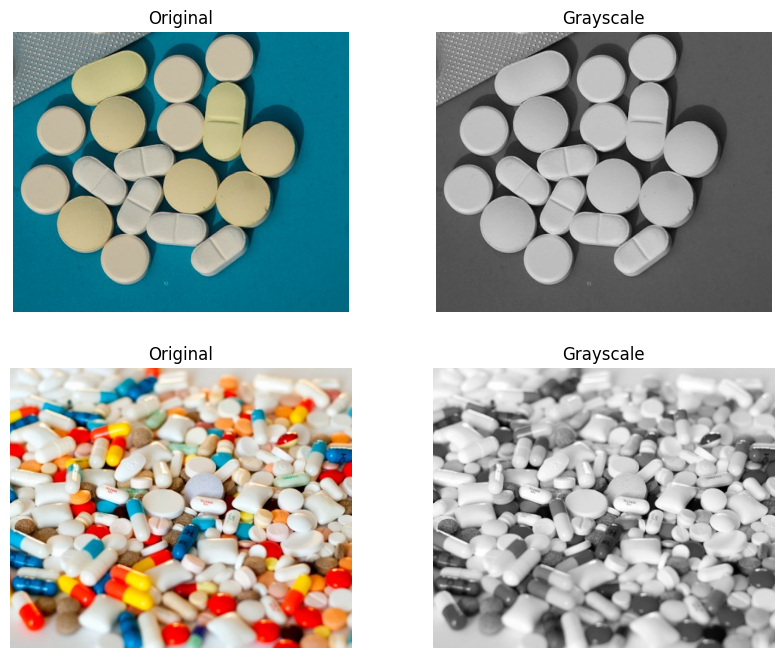

In [ ]:
# Cargar imagenes
img = cv.imread('/content/drive/Shareddrives/Equipo 12 - Vision/ProyectoFinal/pills.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img2 = cv.imread('/content/drive/Shareddrives/Equipo 12 - Vision/ProyectoFinal/piles-of-pills.jpg')
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(gray2, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.show()

### Preprocesamiento


#### Convertir a imagen binaria con el algoritmo Otsu

La técnica de binarización de Otsu es utilizada en procesamiento de imagenes para separar el primer plano (foreground) del fondo (background) de una imagen en dos clases distintas. Esto se logra encontrando el valor del umbral óptimo que maximiza la varianza entre ambas clases. El método de Otsu se distingue por su simplicidad y eficiencia computacional, haciendolo ideal para aplicaciones como análisis de documentos, reconocimiento de objetos e imagenes médicas.

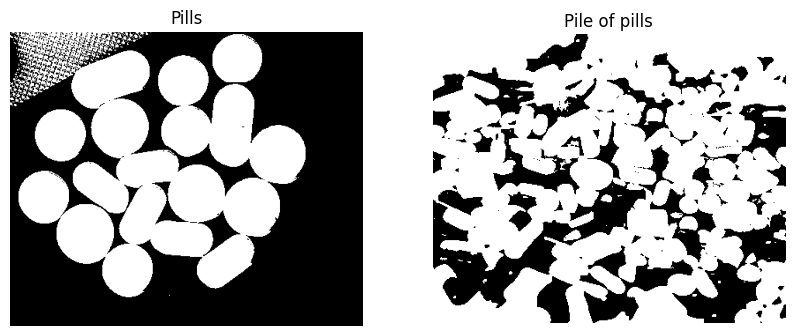

In [ ]:
# Thresholding
ret, bin_img = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ret2, bin_img2 = cv.threshold(gray2, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

fig = plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(bin_img, cmap='gray')
plt.title('Pills')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(bin_img2, cmap='gray')
plt.title('Pile of pills')
plt.axis('off')

plt.show()

#### Remover ruido

Utilizando operaciones morfológicas para remover el ruido de la imagen.


**Gradiente Morfológico**

*El gradiente morfológico es utilizado en procesamiento de imágenes para enfatizar bordes de objetos en una imagen. Se obtiene al sustraer el erosionado de la dilatación morfológica de una imagen. La erosión encoge las regiones brillantes en la imagen, mientras que la dilatación las expande y el gradiente morfológico representa la diferencia entre ambas operaciones. Esta operación es útil en tareas como detección de objetos y segmentación, y se puede también combinar con otras operaciones morfológicas para mejoramiento o filtrado de características especificas en una imagen.*

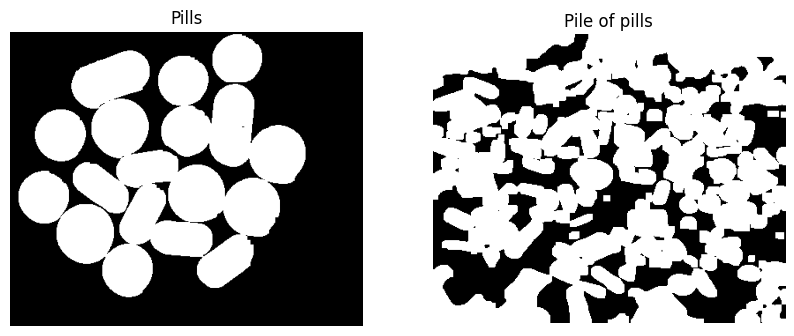

In [ ]:
# noise removal
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
bin_img = cv.morphologyEx(bin_img,
                           cv.MORPH_OPEN,
                           kernel,
                           iterations=3)

bin_img2 = cv.morphologyEx(bin_img2,
                           cv.MORPH_OPEN,
                           kernel,
                           iterations=3)

fig = plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(bin_img, cmap='gray')
plt.title('Pills')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(bin_img2, cmap='gray')
plt.title('Pile of pills')
plt.axis('off')

plt.show()

### Caso donde Watershed da resultados óptimos (Pills)

#### Detectando el fondo (background) y primer plano (foreground) de la imagen

Las regiones de interés en color blanco representan el primer plano (foreground), por lo tanto el resto en color negro es el fondo (background).

Se aplican las siguientes operaciones a la imagen binaria:
1. La operación de Dilatación “cv.dilate” expande las regiones brillantes, creando una región de "fondo seguro" (sure background).
2. La siguiente operación “cv.distanceTransform” calcula la distancia de cada pixel blanco al pixel negro mas cercano en la imagen binaria. El resultado se guarda en la variable "dist".
3. El area de primer plano (foreground) se obtiene aplicando un Threshold (umbral) en la variable "dist" usando “cv.threshold”. El umbral se fija a 0.5 X el maximo valor de "dist".
4. Finalmente, el area desconocida se calcula como la diferencia entre el "fondo seguro" y el foreground usando “cv.subtract”. El resultado se guarda en la variable "unknown".


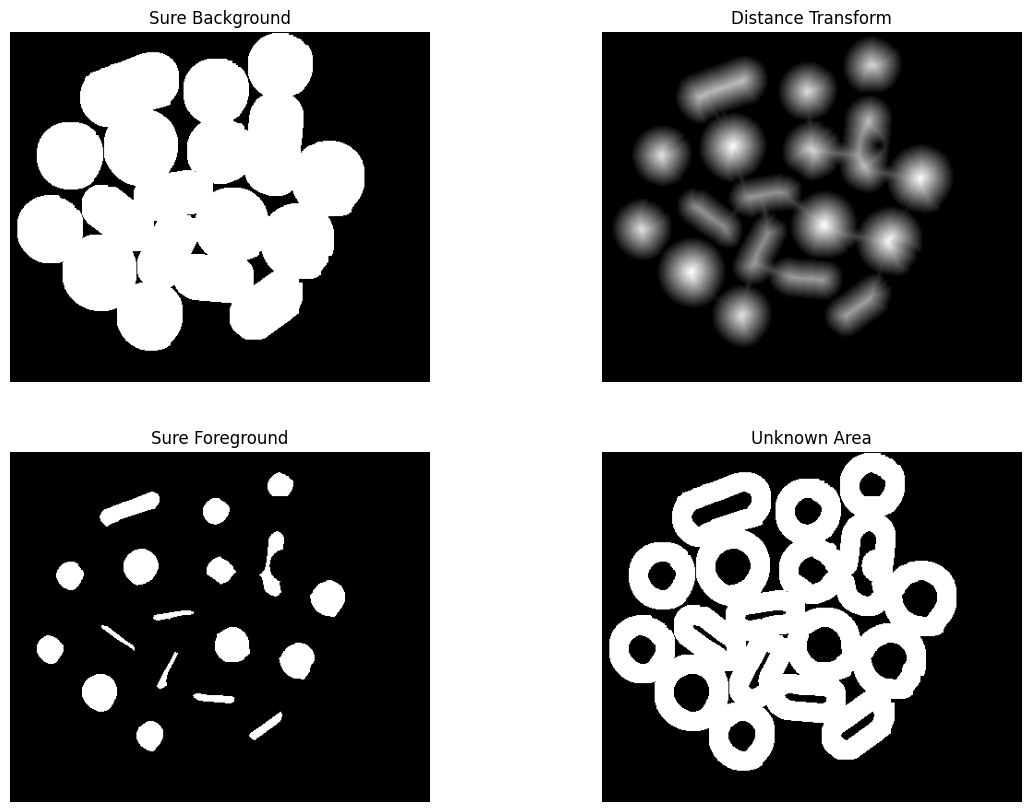

In [ ]:
# Create subplots with 1 row and 2 columns
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig = plt.figure(figsize=(14, 10))

# sure background area
sure_bg = cv.dilate(bin_img, kernel, iterations=3)
plt.subplot(2, 2, 1)
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background')
plt.axis('off')

# Distance transform
dist = cv.distanceTransform(bin_img, cv.DIST_L2, 5)
plt.subplot(2, 2, 2)
plt.imshow(dist, cmap='gray')
plt.title('Distance Transform')
plt.axis('off')

# foreground area
ret, sure_fg = cv.threshold(dist, 0.5 * dist.max(), 255, cv.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
plt.subplot(2, 2, 3)
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.axis('off')

# unknown area
unknown = cv.subtract(sure_bg, sure_fg)
plt.subplot(2, 2, 4)
plt.imshow(unknown, cmap='gray')
plt.title('Unknown Area')
plt.axis('off')

plt.show()

### Caso donde Watershed no da resultados óptimos (Pile of Pills)

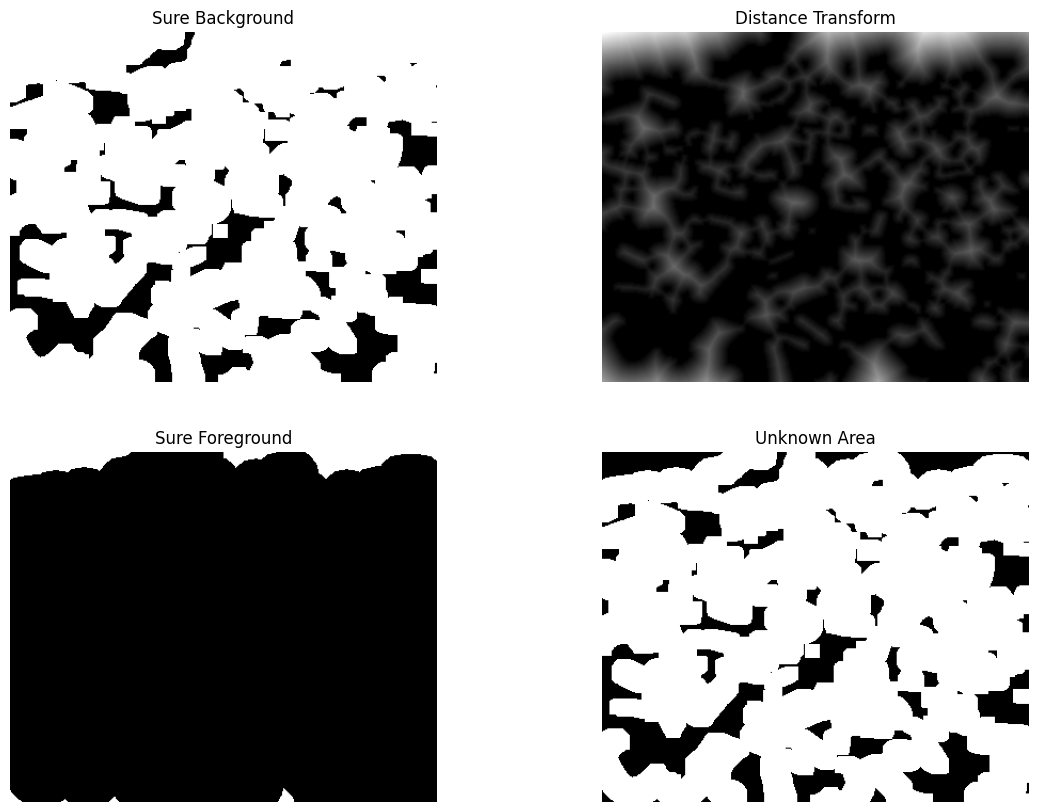

In [ ]:
# Create subplots with 1 row and 2 columns
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig = plt.figure(figsize=(14, 10))
# sure background area
sure_bg2 = cv.dilate(bin_img2, kernel, iterations=3)
plt.subplot(2, 2, 1)
plt.imshow(sure_bg2, cmap='gray')
plt.title('Sure Background')
plt.axis('off')

# Distance transform
dist = cv.distanceTransform(bin_img2, cv.DIST_L2, 5)
plt.subplot(2, 2, 2)
plt.imshow(dist, cmap='gray')
plt.title('Distance Transform')
plt.axis('off')

#foreground area
ret, sure_fg2 = cv.threshold(dist, 0.5 * dist.max(), 255, cv.THRESH_BINARY)
sure_fg2 = sure_fg2.astype(np.uint8)
plt.subplot(2, 2, 3)
plt.imshow(sure_fg2, cmap='gray')
plt.title('Sure Foreground')
plt.axis('off')

# unknown area
unknown2 = cv.subtract(sure_bg2, sure_fg2)
plt.subplot(2, 2, 4)
plt.imshow(unknown2, cmap='gray')
plt.title('Unknown Area')
plt.axis('off')

plt.show()

#### Creando los marcadores

1. El método “connectedComponents” de OpenCV se usa para encontrar los componentes conectados en el primer plano de la imagen. El resultado se guarda en "markers".
2. Para distinguir el fondo y el primer plano, los valores en la variable "markers" se incrementan en 1.
3. La region desconcocida, representada por pixeles con valor 255 en "unknown", se etiqueta con 0 en "markers".
4. Finalmente, se despliega la imagen usando matplotlib con el color map “tab20b”.

La imagen de marcadores resultante sirve como entrada al algortitmo Watershed. Esta imagen Guía al algoritmo para segmentar la imagen de acuerdo con las regiones etiquetadas. Cada color o etiqueta representa un segmento o región en la imagen.

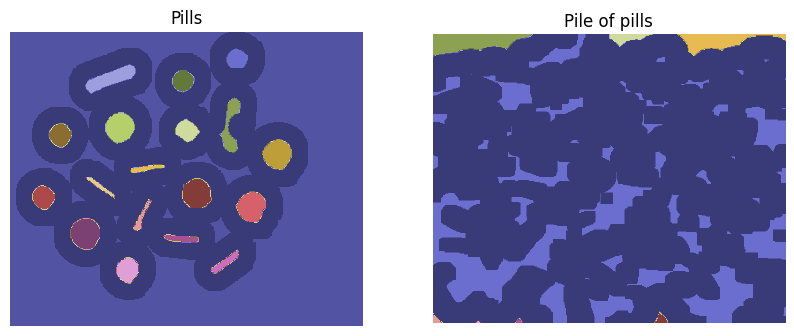

In [ ]:
# Marker labelling
# sure foreground
ret, markers = cv.connectedComponents(sure_fg)
ret2, markers2 = cv.connectedComponents(sure_fg2)

# Add one to all labels so that background is not 0, but 1
markers += 1
markers2 += 1

# mark the region of unknown with zero
markers[unknown == 255] = 0
markers2[unknown2 == 255] = 0

fig = plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(markers, cmap="tab20b")
plt.title('Pills')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(markers2, cmap="tab20b")
plt.title('Pile of pills')
plt.axis('off')

plt.show()

#### Aplicando el algoritmo Watershed a los marcadores

Applying watershed() function. Steps taken:

The “cv2.watershed” function is applied to the original image “img” and the markers image obtained in the previous step to perform the Watershed algorithm. The result is stored in “markers”.
The “markers” image is displayed using Matplotlib’s “imshow” method with a color map of “tab20b”.
A loop iterates over the labels starting from 2 (ignoring the background and unknown regions) to extract the contours of each object.
The contours of the binary image are found using OpenCV’s “findContours” function, and the first contour is appended to a list of coins.
Finally, the objects’ outlines are drawn on the original image using “cv2.drawContours”. The result is displayed using the “imshow” function.

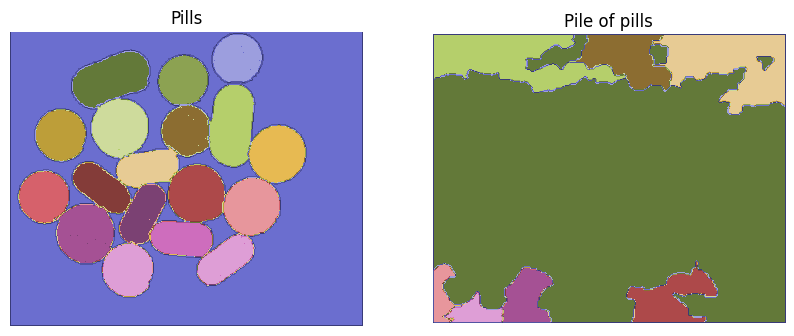

In [ ]:
# watershed Algorithm
markers = cv.watershed(img, markers)
markers2 = cv.watershed(img2, markers2)

labels = np.unique(markers)
labels2 = np.unique(markers2)

pills = []
for label in labels[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
    target = np.where(markers == label, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
    contours, hierarchy = cv.findContours(
        target, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
    )
    pills.append(contours[0])

pills2 = []
for label2 in labels2[2:]:

# Create a binary image in which only the area of the label is in the foreground
#and the rest of the image is in the background
    target2 = np.where(markers2 == label2, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
    contours2, hierarchy2 = cv.findContours(
        target2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
    )
    pills2.append(contours2[0])


img = cv.drawContours(img, pills, -1, color=(0, 23, 223), thickness=2)
img2 = cv.drawContours(img2, pills2, -1, color=(0, 23, 223), thickness=2)

# Draw the outline

fig = plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(markers, cmap="tab20b")
plt.title('Pills')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(markers2, cmap="tab20b")
plt.title('Pile of pills')
plt.axis('off')

plt.show()

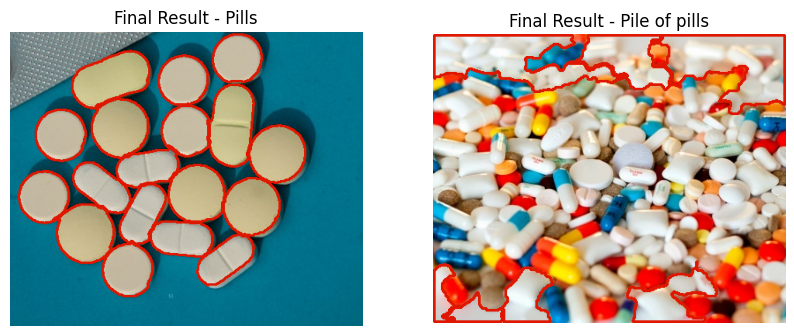

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Final Result - Pills')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('Final Result - Pile of pills')
plt.axis('off')

plt.show()

## Análisis de resultados y conclusiuones

Podemos concluir...

the watershed algorithm is a powerful image segmentation technique that uses topographic information to divide an image into multiple segments or regions. The watershed algorithm is more thoughtful than other segmentation methods, and it is more in line with the impression of the human eye on the image. It is widely used in medical imaging and computer vision applications and is a crucial step in many image processing pipelines. Despite its limitations, the watershed algorithm remains a popular choice for image segmentation tasks due to its ability to handle images with significant amounts of noise and irregular shapes.


Referencias:
1. "Image Segmentation with Watershed Algorithm OpenCV Python"
GeeksforGeeks. (2023, March 8). Image Segmentation with Watershed Algorithm OpenCV Python. Retrieved March 12, 2024, from https://www.geeksforgeeks.org/image-segmentation-with-watershed-algorithm-opencv-python/


2. "Recent Advances in Watershed Segmentation: A Comprehensive Survey"
Najman, L., Schmitt, M., & Couprie, M. (2020). Recent Advances in Watershed Segmentation: A Comprehensive Survey. arXiv preprint arXiv:2303.16609.

3. "Watershed Segmentation Revisited: A New Formulation and Efficient Implementation"
Meyer, F., & Beucher, S. (2009). Watershed Segmentation Revisited: A New Formulation and Efficient Implementation. IEEE Transactions on Image Processing, 18(11), 2329-2345.

4. "A Survey of Watershed Based Image Segmentation Methods"
Gonzalez, R. C., & Woods, R. E. (2018). A Survey of Watershed Based Image Segmentation Methods. In Digital Image Processing (4th ed., pp. 879-912). Pearson.